In [36]:
#Import Python Libraries
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [37]:
#Read data into dataframe and display info
df = pd.read_csv("CarPrice.csv") 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [38]:
#Check for null values
for c in df.columns:
    print(c, df[c].isnull().sum()) 

car_ID 0
symboling 0
CarName 0
fueltype 0
aspiration 0
doornumber 0
carbody 0
drivewheel 0
enginelocation 0
wheelbase 0
carlength 0
carwidth 0
carheight 0
curbweight 0
enginetype 0
cylindernumber 0
enginesize 0
fuelsystem 0
boreratio 0
stroke 0
compressionratio 0
horsepower 0
peakrpm 0
citympg 0
highwaympg 0
price 0


<AxesSubplot:>

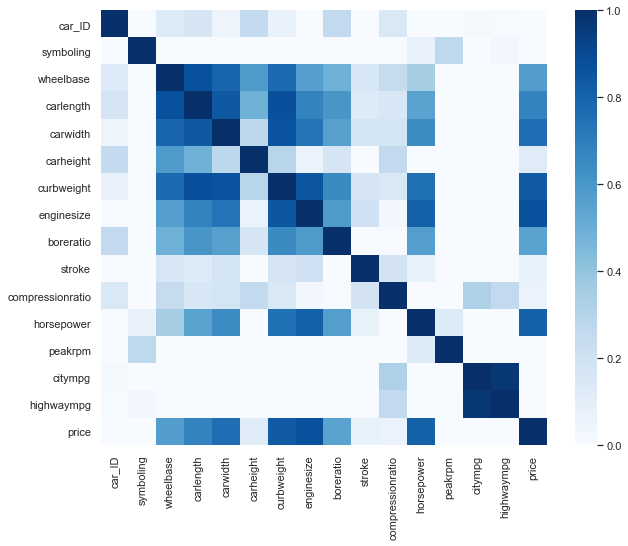

In [39]:
#Show Correlation Heatmap
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(df.corr(),vmin=0, cmap='Blues')

In [40]:
#Creates dummy variables for object type features

df1=df.drop(columns=['car_ID','CarName'])

for i in df1.columns:
    if df1[i].dtype=='object':
        df1=pd.get_dummies(df1,columns=[i])

df1.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
#Split Training and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(df1, test_size=0.3, random_state=1)



In [42]:
#Splits independent variables and target variable from training data
X=X_train.drop(columns=['price'])
y=X_train['price']


In [47]:
#Linear Regression Mixed Feature Selection
#Adds highest correlated feature  and then removes features with pvalues > .05 in a loop
#until all features are either added or removed from list
best = ['',-5]
addfeatures=[]
dropfeatures=[]

while len(addfeatures+dropfeatures)<len(X.columns):
    
    best = ['',-5]  
    for i in X.columns:
        if i not in (addfeatures+dropfeatures):
            xi=X[addfeatures+[i]]
            xi=sm.add_constant(xi,has_constant='add')            
            model = sm.OLS(y,xi).fit()
            if model.rsquared>best[1]:
                best = [i, model.rsquared]
               
     
    addfeatures.append(best[0])
    xi=sm.add_constant(X[addfeatures],has_constant='add')
    model  = sm.OLS(y,xi).fit()
    j=0
    i=1
   
    while j<len(addfeatures):
        
        if model.pvalues[i]>.05:
            dropfeatures.append(addfeatures[j])
            addfeatures.remove(addfeatures[j])
            j=j-1
        j=j+1
        i=i+1

xi=sm.add_constant(X[addfeatures],has_constant='add')
model=sm.OLS(y,xi).fit() 
xi_test=sm.add_constant(X_test[addfeatures],has_constant='add')
y_test=model.predict(xi_test)
rss=sum((X_test['price']-y_test)**2)
mean=X_test['price'].mean()
tss=sum((X_test['price']-mean)**2)
r2=1-(rss/tss)
n=X_test['price'].size
k=len(addfeatures)
adjr2 = 1-((1-r2)*(n-1)/(n-k-1))
print('Test R Squared:',r2,' Test Adjusted R Squared:',adjr2)
print(model.summary())              
                

Test R Squared: 0.8505528917253298  Test Adjusted R Squared: 0.7974161421165582
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     133.7
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           1.44e-65
Time:                        09:59:52   Log-Likelihood:                -1309.8
No. Observations:                 143   AIC:                             2644.
Df Residuals:                     131   BIC:                             2679.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\re487\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<AxesSubplot:>

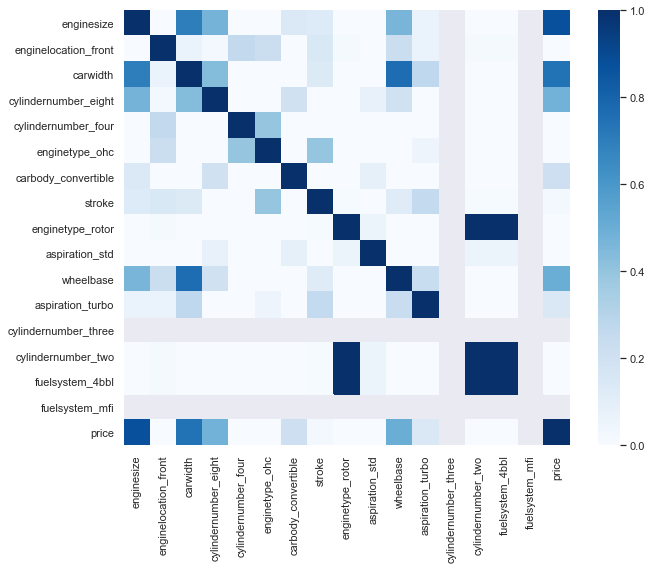

In [48]:
#Show heatmap with selected features
temp=[X[addfeatures],y]
tempframe = pd.concat(temp,axis=1)
sns.heatmap(tempframe.corr(),vmin=0,cmap="Blues")

In [49]:
#Remove features with coefficient of 0
addfeatures.remove('cylindernumber_three')
addfeatures.remove('fuelsystem_mfi')


In [50]:
#Removes features with high VIF values
 

vif_number=[]
best=['',-10]
while_test=0

while while_test==0:
    vif_features=[]
    
    for i in addfeatures:

        yi=X[i]

        xi=X[addfeatures].drop(columns=i)
        xi=sm.add_constant(xi,has_constant='add')
        model = sm.OLS(yi,xi).fit()

        temp_vif=1/(1-model.rsquared)

        if temp_vif>5:
            vif_features.append(i)
            vif_number.append(temp_vif)

    dropfeature_test=0
    highest_corr=['',-10] 
       

    if len(vif_features)>0:
        
        for i in vif_features:

            if y.corr(X[i])>highest_corr[1]:
                highest_corr=[i,y.corr(X[i])]

        
        if len(vif_features)==1:
            addfeatures.remove(vif_features[0])
            vif_features.remove(vif_features[0])
            dropfeature_test=1
            

        else:
            high_corr=['',-5]
            for j in vif_features:
                
                if X[highest_corr[0]].corr(X[j])>high_corr[1] and highest_corr[0]!=j:
                    high_corr=[j,X[highest_corr[0]].corr(X[j])]                      
                    dropfeature_test=1
                    

            if dropfeature_test==1:
                    addfeatures.remove(high_corr[0])
                    vif_features.remove(high_corr[0])
                      
    else:
        while_test=1
        
xi=sm.add_constant(X[addfeatures],has_constant='add')
model=sm.OLS(y,xi).fit() 
xi_test=sm.add_constant(X_test[addfeatures],has_constant='add')
y_test=model.predict(xi_test)
rss=sum((X_test['price']-y_test)**2)
mean=X_test['price'].mean()
tss=sum((X_test['price']-mean)**2)
r2=1-(rss/tss)
n=X_test['price'].size
k=len(addfeatures)
adjr2 = 1-((1-r2)*(n-1)/(n-k-1))
print('Test R Squared:',r2,' Test Adjusted R Squared:',adjr2)
print(model.summary()) 


<ipython-input-50-22caf0d0e018>:19: RuntimeWarning: divide by zero encountered in double_scalars
  temp_vif=1/(1-model.rsquared)


Test R Squared: 0.8335495079233293  Test Adjusted R Squared: 0.7969303996664617
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     133.7
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           1.44e-65
Time:                        10:00:11   Log-Likelihood:                -1309.8
No. Observations:                 143   AIC:                             2644.
Df Residuals:                     131   BIC:                             2679.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
#Creates list of R Square and Adjusted R Square value with increasing number of features

feature=[]
rsquare=[]
adjr2=[]
testr2=[]
test_adjr2=[]

for i in addfeatures:
    feature.append(i)
    xi=sm.add_constant(X[feature],has_constant='add')
    model=sm.OLS(y,xi).fit()
    rsquare.append(model.rsquared)
    adjr2.append(model.rsquared_adj)
    
    xi_test=sm.add_constant(X_test[feature],has_constant='add')
    y_test=model.predict(xi_test)
    rss=sum((X_test['price']-y_test)**2)
    mean=X_test['price'].mean()
    tss=sum((X_test['price']-mean)**2)
    r2=1-(rss/tss)
    testr2.append(r2)
    n=X_test['price'].size
    k=len(feature)
    r2adj = 1-((1-r2)*(n-1)/(n-k-1))
    test_adjr2.append(r2adj)
    


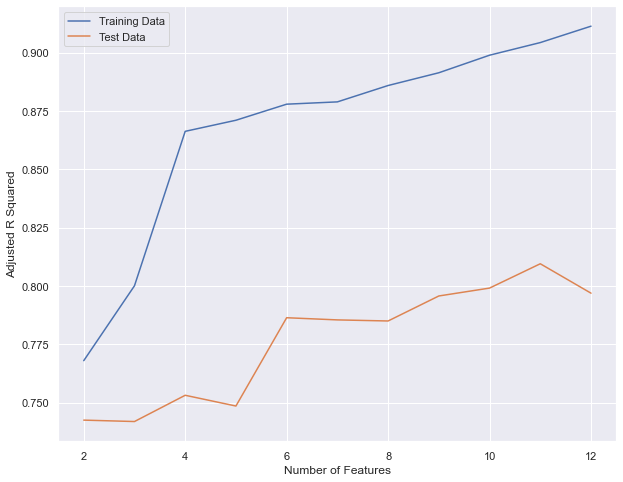

In [52]:
#Plots the adjusted r2 for Train and Test data with increasing number of features
plt.plot(range(2, len(feature)+2),adjr2,label='Training Data')
plt.plot(range(2, len(feature)+2),test_adjr2,label='Test Data')
plt.legend()
plt.xlabel('Number of Features')
plt.ylabel('Adjusted R Squared')
plt.show()